In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
%matplotlib inline

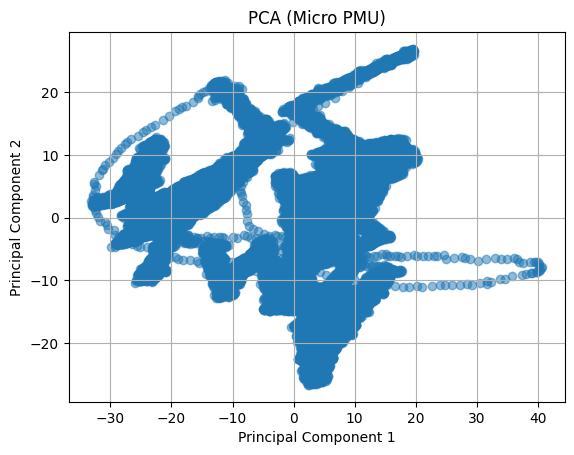

In [4]:
#implementing PCA on following dataset:
#creating path to store files related to this dataset;

data = pd.read_csv(
    "../Datasets/Synthetic PMU Data/ACTIVSg2000 - Far West.csv")
data.dropna(inplace=True)

features = data[['Bus ODESSA 2 0 V pu',
 'Bus ODESSA 2 0 V angle',
 'Bus ODESSA 2 0 Frequency',
 'Bus PRESIDIO 2 0 V pu',
 'Bus PRESIDIO 2 0 V angle',
 'Bus PRESIDIO 2 0 Frequency',
 'Bus O DONNELL 1 0 V pu',
 'Bus O DONNELL 1 0 V angle',
 'Bus O DONNELL 1 0 Frequency',
 'Bus O DONNELL 1 1 V pu',
 'Bus O DONNELL 1 1 V angle',
 'Bus O DONNELL 1 1 Frequency',
 'Bus BIG SPRING 5 0 V pu',
 'Bus BIG SPRING 5 0 V angle',
 'Bus BIG SPRING 5 0 Frequency',
 'Bus BIG SPRING 5 1 V pu',
 'Bus BIG SPRING 5 1 V angle',
 'Bus BIG SPRING 5 1 Frequency',
 'Bus VAN HORN 0 V pu',
 'Bus VAN HORN 0 V angle',
 'Bus VAN HORN 0 Frequency',
 'Bus IRAAN 2 0 V pu',
 'Bus IRAAN 2 0 V angle',
 'Bus IRAAN 2 0 Frequency',
 'Bus IRAAN 2 1 V pu',
 'Bus IRAAN 2 1 V angle',
 'Bus IRAAN 2 1 Frequency',
 'Bus PRESIDIO 1 0 V pu',
 'Bus PRESIDIO 1 0 V angle',
 'Bus PRESIDIO 1 0 Frequency',
 'Bus PRESIDIO 1 1 V pu',
 'Bus PRESIDIO 1 1 V angle',
 'Bus PRESIDIO 1 1 Frequency',
 'Bus SANDERSON 0 V pu',
 'Bus SANDERSON 0 V angle',
 'Bus SANDERSON 0 Frequency',
 'Bus MONAHANS 2 0 V pu',
 'Bus MONAHANS 2 0 V angle',
 'Bus MONAHANS 2 0 Frequency',
 'Bus GRANDFALLS 0 V pu',
 'Bus GRANDFALLS 0 V angle',
 'Bus GRANDFALLS 0 Frequency',
 'Bus MARFA 0 V pu',
 'Bus MARFA 0 V angle',
 'Bus MARFA 0 Frequency',
 'Bus GARDEN CITY 0 V pu',
 'Bus GARDEN CITY 0 V angle',
 'Bus GARDEN CITY 0 Frequency',
 'Bus ODESSA 4 0 V pu',
 'Bus ODESSA 4 0 V angle',
 'Bus ODESSA 4 0 Frequency',
 'Bus NOTREES 0 V pu',
 'Bus NOTREES 0 V angle',
 'Bus NOTREES 0 Frequency',
 'Bus MIDLAND 4 0 V pu',
 'Bus MIDLAND 4 0 V angle',
 'Bus MIDLAND 4 0 Frequency',
 'Bus BIG SPRING 1 0 V pu',
 'Bus BIG SPRING 1 0 V angle',
 'Bus BIG SPRING 1 0 Frequency',
 'Bus BIG SPRING 1 1 V pu',
 'Bus BIG SPRING 1 1 V angle',
 'Bus BIG SPRING 1 1 Frequency',
 'Bus O DONNELL 2 0 V pu',
 'Bus O DONNELL 2 0 V angle',
 'Bus O DONNELL 2 0 Frequency',
 'Bus O DONNELL 2 1 V pu',
 'Bus O DONNELL 2 1 V angle',
 'Bus O DONNELL 2 1 Frequency',
 'Bus ODESSA 6 0 V pu',
 'Bus ODESSA 6 0 V angle',
 'Bus ODESSA 6 0 Frequency',
 'Bus BIG SPRINGS 0 V pu',
 'Bus BIG SPRINGS 0 V angle',
 'Bus BIG SPRINGS 0 Frequency',
 'Bus BIG SPRINGS 1 V pu',
 'Bus BIG SPRINGS 1 V angle',
 'Bus BIG SPRINGS 1 Frequency',
 'Bus MIDLAND 2 0 V pu',
 'Bus MIDLAND 2 0 V angle',
 'Bus MIDLAND 2 0 Frequency',
 'Bus COAHOMA 0 V pu',
 'Bus COAHOMA 0 V angle',
 'Bus COAHOMA 0 Frequency',
 'Bus MIDLAND 3 0 V pu',
 'Bus MIDLAND 3 0 V angle',
 'Bus MIDLAND 3 0 Frequency',
 'Bus ALPINE 0 V pu',
 'Bus ALPINE 0 V angle',
 'Bus ALPINE 0 Frequency',
 'Bus FORT DAVIS 0 V pu',
 'Bus FORT DAVIS 0 V angle',
 'Bus FORT DAVIS 0 Frequency',
 'Bus MCCAMEY 1 0 V pu',
 'Bus MCCAMEY 1 0 V angle',
 'Bus MCCAMEY 1 0 Frequency',
 'Bus MCCAMEY 1 1 V pu',
 'Bus MCCAMEY 1 1 V angle',
 'Bus MCCAMEY 1 1 Frequency',
 'Bus BIG SPRING 4 0 V pu',
 'Bus BIG SPRING 4 0 V angle',
 'Bus BIG SPRING 4 0 Frequency',
 'Bus BIG SPRING 4 1 V pu',
 'Bus BIG SPRING 4 1 V angle',
 'Bus BIG SPRING 4 1 Frequency',
 'Bus CRANE 0 V pu',
 'Bus CRANE 0 V angle',
 'Bus CRANE 0 Frequency',
 'Bus ODESSA 5 0 V pu',
 'Bus ODESSA 5 0 V angle',
 'Bus ODESSA 5 0 Frequency',
 'Bus FORT STOCKTON 1 0 V pu',
 'Bus FORT STOCKTON 1 0 V angle',
 'Bus FORT STOCKTON 1 0 Frequency',
 'Bus FORT STOCKTON 1 1 V pu',
 'Bus FORT STOCKTON 1 1 V angle',
 'Bus FORT STOCKTON 1 1 Frequency',
 'Bus ANDREWS 0 V pu',
 'Bus ANDREWS 0 V angle',
 'Bus ANDREWS 0 Frequency',
 'Bus FORSAN 0 V pu',
 'Bus FORSAN 0 V angle',
 'Bus FORSAN 0 Frequency',
 'Bus FORSAN 1 V pu',
 'Bus FORSAN 1 V angle',
 'Bus FORSAN 1 Frequency',
 'Bus FORSAN 2 V pu',
 'Bus FORSAN 2 V angle',
 'Bus FORSAN 2 Frequency',
 'Bus BIG LAKE 0 V pu',
 'Bus BIG LAKE 0 V angle',
 'Bus BIG LAKE 0 Frequency',
 'Bus MIDLAND 5 0 V pu',
 'Bus MIDLAND 5 0 V angle',
 'Bus MIDLAND 5 0 Frequency',
 'Bus OZONA 0 V pu',
 'Bus OZONA 0 V angle',
 'Bus OZONA 0 Frequency',
 'Bus MONAHANS 1 0 V pu',
 'Bus MONAHANS 1 0 V angle',
 'Bus MONAHANS 1 0 Frequency',
 'Bus MONAHANS 1 1 V pu',
 'Bus MONAHANS 1 1 V angle',
 'Bus MONAHANS 1 1 Frequency',
 'Bus MONAHANS 1 2 V pu',
 'Bus MONAHANS 1 2 V angle',
 'Bus MONAHANS 1 2 Frequency',
 'Bus MONAHANS 1 3 V pu',
 'Bus MONAHANS 1 3 V angle',
 'Bus MONAHANS 1 3 Frequency',
 'Bus MONAHANS 1 4 V pu',
 'Bus MONAHANS 1 4 V angle',
 'Bus MONAHANS 1 4 Frequency',
 'Bus MONAHANS 1 5 V pu',
 'Bus MONAHANS 1 5 V angle',
 'Bus MONAHANS 1 5 Frequency',
 'Bus MONAHANS 1 6 V pu',
 'Bus MONAHANS 1 6 V angle',
 'Bus MONAHANS 1 6 Frequency',
 'Bus STANTON 0 V pu',
 'Bus STANTON 0 V angle',
 'Bus STANTON 0 Frequency',
 'Bus ODONNELL 0 V pu',
 'Bus ODONNELL 0 V angle',
 'Bus ODONNELL 0 Frequency',
 'Bus LENORAH 0 V pu',
 'Bus LENORAH 0 V angle',
 'Bus LENORAH 0 Frequency',
 'Bus LENORAH 1 V pu',
 'Bus LENORAH 1 V angle',
 'Bus LENORAH 1 Frequency',
 'Bus IRAAN 3 0 V pu',
 'Bus IRAAN 3 0 V angle',
 'Bus IRAAN 3 0 Frequency',
 'Bus IRAAN 3 1 V pu',
 'Bus IRAAN 3 1 V angle',
 'Bus IRAAN 3 1 Frequency',
 'Bus IRAAN 3 2 V pu',
 'Bus IRAAN 3 2 V angle',
 'Bus IRAAN 3 2 Frequency',
 'Bus BIG SPRING 6 0 V pu',
 'Bus BIG SPRING 6 0 V angle',
 'Bus BIG SPRING 6 0 Frequency',
 'Bus BIG SPRING 6 1 V pu',
 'Bus BIG SPRING 6 1 V angle',
 'Bus BIG SPRING 6 1 Frequency',
 'Bus BIG SPRING 6 2 V pu',
 'Bus BIG SPRING 6 2 V angle',
 'Bus BIG SPRING 6 2 Frequency',
 'Bus ODESSA 3 0 V pu',
 'Bus ODESSA 3 0 V angle',
 'Bus ODESSA 3 0 Frequency',
 'Bus BIG SPRING 3 0 V pu',
 'Bus BIG SPRING 3 0 V angle',
 'Bus BIG SPRING 3 0 Frequency',
 'Bus BIG SPRING 3 1 V pu',
 'Bus BIG SPRING 3 1 V angle',
 'Bus BIG SPRING 3 1 Frequency',
 'Bus BIG SPRING 7 0 V pu',
 'Bus BIG SPRING 7 0 V angle',
 'Bus BIG SPRING 7 0 Frequency',
 'Bus MIDLAND 1 0 V pu',
 'Bus MIDLAND 1 0 V angle',
 'Bus MIDLAND 1 0 Frequency',
 'Bus IRAAN 1 0 V pu',
 'Bus IRAAN 1 0 V angle',
 'Bus IRAAN 1 0 Frequency',
 'Bus IRAAN 1 1 V pu',
 'Bus IRAAN 1 1 V angle',
 'Bus IRAAN 1 1 Frequency',
 'Bus ODESSA 1 0 V pu',
 'Bus ODESSA 1 0 V angle',
 'Bus ODESSA 1 0 Frequency',
 'Bus ODESSA 1 1 V pu',
 'Bus ODESSA 1 1 V angle',
 'Bus ODESSA 1 1 Frequency',
 'Bus ODESSA 1 2 V pu',
 'Bus ODESSA 1 2 V angle',
 'Bus ODESSA 1 2 Frequency',
 'Bus ODESSA 1 3 V pu',
 'Bus ODESSA 1 3 V angle',
 'Bus ODESSA 1 3 Frequency',
 'Bus ODESSA 1 4 V pu',
 'Bus ODESSA 1 4 V angle',
 'Bus ODESSA 1 4 Frequency',
 'Bus ODESSA 1 5 V pu',
 'Bus ODESSA 1 5 V angle',
 'Bus ODESSA 1 5 Frequency',
 'Bus ODESSA 1 6 V pu',
 'Bus ODESSA 1 6 V angle',
 'Bus ODESSA 1 6 Frequency',
 'Bus ODESSA 1 7 V pu',
 'Bus ODESSA 1 7 V angle',
 'Bus ODESSA 1 7 Frequency',
 'Bus ODESSA 1 8 V pu',
 'Bus ODESSA 1 8 V angle',
 'Bus ODESSA 1 8 Frequency',
 'Bus ODESSA 1 9 V pu',
 'Bus ODESSA 1 9 V angle',
 'Bus ODESSA 1 9 Frequency',
 'Bus ODESSA 1 10 V pu',
 'Bus ODESSA 1 10 V angle',
 'Bus ODESSA 1 10 Frequency',
 'Bus FORT STOCKTON 2 0 V pu',
 'Bus FORT STOCKTON 2 0 V angle',
 'Bus FORT STOCKTON 2 0 Frequency',
 'Bus FORT STOCKTON 3 0 V pu',
 'Bus FORT STOCKTON 3 0 V angle',
 'Bus FORT STOCKTON 3 0 Frequency',
 'Bus BIG SPRING 2 0 V pu',
 'Bus BIG SPRING 2 0 V angle',
 'Bus BIG SPRING 2 0 Frequency',
 'Bus KERMIT 0 V pu',
 'Bus KERMIT 0 V angle',
 'Bus KERMIT 0 Frequency',
 'Bus PECOS 0 V pu',
 'Bus PECOS 0 V angle',
 'Bus PECOS 0 Frequency',
 'Bus SHEFFIELD 0 V pu',
 'Bus SHEFFIELD 0 V angle',
 'Bus SHEFFIELD 0 Frequency',
 'Bus MCCAMEY 2 0 V pu',
 'Bus MCCAMEY 2 0 V angle',
 'Bus MCCAMEY 2 0 Frequency',
 'Bus LAMESA 0 V pu',
 'Bus LAMESA 0 V angle',
 'Bus LAMESA 0 Frequency',
 'Bus GOLDSMITH 0 V pu',
 'Bus GOLDSMITH 0 V angle',
 'Bus GOLDSMITH 0 Frequency',
 'Bus RALLS 2 0 V pu',
 'Bus RALLS 2 0 V angle',
 'Bus RALLS 2 0 Frequency']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)
endPCAcalcTime = time.time()

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA (Micro PMU)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
   

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
from tqdm import tqdm
%matplotlib inline

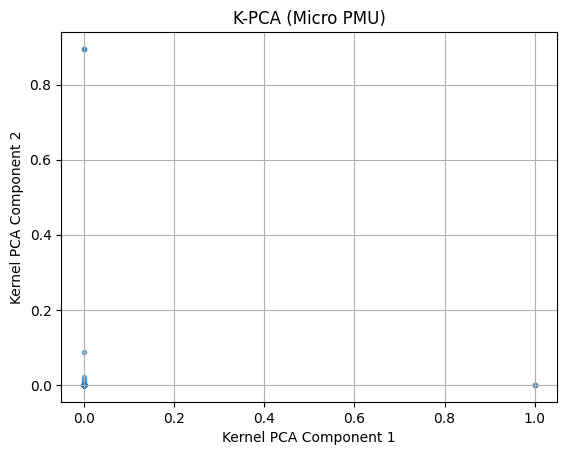

In [6]:
batchSize = 30000
currentIndex = 0
startIndex = 0
endIndex = startIndex + batchSize
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)  # Using RBF
X_reduced = kpca.fit_transform(scaled_features[startIndex:endIndex]) 
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, s=10)
plt.title('K-PCA (Micro PMU)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.grid()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
%matplotlib inline
from tqdm import tqdm

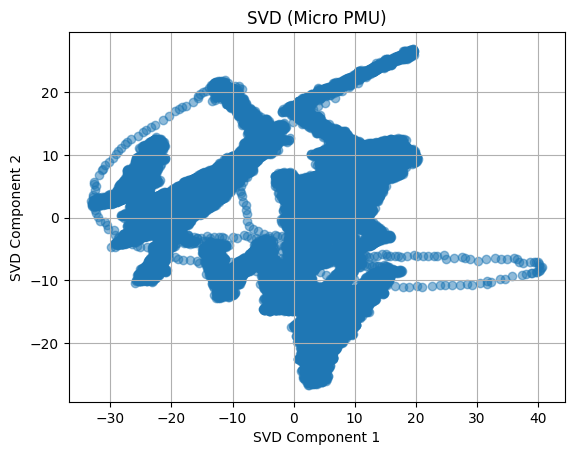

In [8]:
svd = TruncatedSVD(n_components=7)
datasetReduced = svd.fit_transform(scaled_features).astype(np.float32) 
plt.scatter(datasetReduced[:, 0], datasetReduced[:, 1], alpha=0.5)
plt.title('SVD (Micro PMU)')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
from tqdm import tqdm
%matplotlib inline

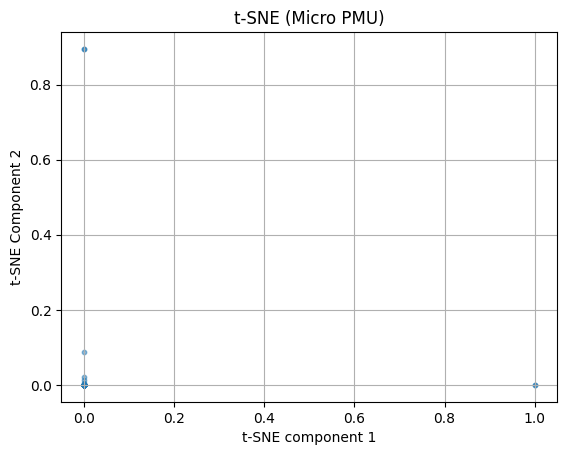

In [10]:
kpca = TSNE(n_components=2,
                perplexity=30,
                max_iter=3000,
                random_state=42)
X_Reduced = np.float32(kpca.fit_transform(scaled_features[startIndex:endIndex]))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, s=10)
plt.title('t-SNE (Micro PMU)')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

/home/muhammadinan/finalYearProject/.venv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/muhammadinan/finalYearProject/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/muhammadinan/finalYearProject/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/muhammadinan/finalYearProject/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_mat

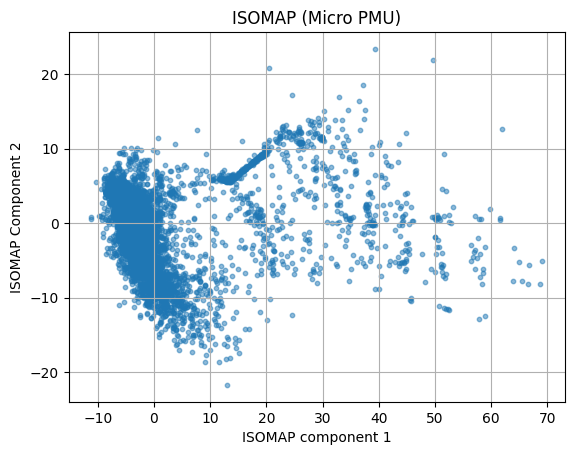

In [25]:
import pandas as pd
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

batchSize = 8000
currentIndex = 0
startIndex = 0
endIndex = startIndex + batchSize

n_components = 2  # Number of components you want to keep
n_neighbors = 5   # Number of neighbors to consider for each point
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
features_isomap = isomap.fit_transform(scaled_features[startIndex:endIndex])
plt.scatter(features_isomap[:, 0], features_isomap[:, 1], alpha=0.5, s=10)
plt.title('ISOMAP (Micro PMU)')
plt.xlabel('ISOMAP component 1')
plt.ylabel('ISOMAP Component 2')
plt.grid()
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
%matplotlib inline

In [12]:
X = features = dataset[['VL2',
                'VL3',
                'AL1',
                'AL2',
                'AL3',
                'IC1',
                'IC2',
                'IC3',
                'AC1',
                'AC2',
                'AC3']].astype(np.float32)
y = dataset["VL1"].astype(np.float32) # Target variable
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.astype('category').cat.codes
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions (or less)
X_lda = lda.fit_transform(X, y)

# Visualizing the LDA results
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.5, s=10)
plt.title('LDA (Micro PMU)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 